<a href="https://colab.research.google.com/github/elianreis06/Machine-Learning-/blob/main/Regress%C3%A3o_linear_simples_com_dados_ausentes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# numpy importa funções matemáticas que ajudam a lidar com grandes conjuntos de dados
import numpy as np  

# manipulação e análise de dados
import pandas as pd 

from sklearn.impute import SimpleImputer # importando módulo para lidar com dados ausentes
from sklearn.compose import ColumnTransformer # aplica transformações nas colunas ou features
from sklearn.preprocessing import OneHotEncoder #  cria uma coluna binária para cada categoria e retorna uma matriz esparsa
from sklearn.preprocessing import LabelEncoder # codificação em rótulos, iniciando no zero
from sklearn.model_selection import train_test_split # modulo para separar os dados
from sklearn.preprocessing import StandardScaler # padronização dos dados
from sklearn.preprocessing import MinMaxScaler # padronização dos dados

import matplotlib.pyplot as plt 

In [2]:
dados = pd.read_csv('Salario.csv') 
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values

print("************ Apresentação dos Dados ************")
print(dados)
print(type(dados))

print("\n************ Apresentação de X ************")
print(X)
print(type(X))

print("\n************ Apresentação de y ************")
print(y)
print(type(y))

************ Apresentação dos Dados ************
    Anos   Salario
0    1.1   39343.0
1    1.3   46205.0
2    1.5   37731.0
3    NaN   43525.0
4    2.2   39891.0
5    2.9   56642.0
6    3.0       NaN
7    3.2   54445.0
8    3.2   64445.0
9    3.7   57189.0
10   3.9   63218.0
11   4.0       NaN
12   4.0   56957.0
13   4.1   57081.0
14   4.5   61111.0
15   NaN   67938.0
16   5.1   66029.0
17   5.3   83088.0
18   5.9   81363.0
19   6.0       NaN
20   6.8   91738.0
21   7.1   98273.0
22   7.9  101302.0
23   8.2  113812.0
24   NaN  109431.0
25   9.0  105582.0
26   9.5  116969.0
27   9.6       NaN
28  10.3  122391.0
29  10.5  121872.0
<class 'pandas.core.frame.DataFrame'>

************ Apresentação de X ************
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ nan]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ nan]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ nan]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
<class 'numpy.ndarray'>

************ 

Dados Ausentes

In [3]:
estrategia = 'mean'
valor = None

imputer = SimpleImputer(missing_values=np.nan, strategy=estrategia,fill_value=valor) # median , most_frequent , constant + fill_value
X = imputer.fit_transform(X)

print("\n************ Novos Dados de X ************")
print(X)




************ Novos Dados de X ************
[[ 1.1       ]
 [ 1.3       ]
 [ 1.5       ]
 [ 5.32592593]
 [ 2.2       ]
 [ 2.9       ]
 [ 3.        ]
 [ 3.2       ]
 [ 3.2       ]
 [ 3.7       ]
 [ 3.9       ]
 [ 4.        ]
 [ 4.        ]
 [ 4.1       ]
 [ 4.5       ]
 [ 5.32592593]
 [ 5.1       ]
 [ 5.3       ]
 [ 5.9       ]
 [ 6.        ]
 [ 6.8       ]
 [ 7.1       ]
 [ 7.9       ]
 [ 8.2       ]
 [ 5.32592593]
 [ 9.        ]
 [ 9.5       ]
 [ 9.6       ]
 [10.3       ]
 [10.5       ]]


In [4]:
y2 = y.reshape(-1,1)
imputer2 = SimpleImputer(missing_values=np.nan, strategy=estrategia,fill_value=valor) # median , most_frequent , constant + fill_value
y = imputer.fit_transform(y2)

print("\n************ Novos Dados de Y ************")
print(y)


************ Novos Dados de Y ************
[[ 39343.        ]
 [ 46205.        ]
 [ 37731.        ]
 [ 43525.        ]
 [ 39891.        ]
 [ 56642.        ]
 [ 75291.19230769]
 [ 54445.        ]
 [ 64445.        ]
 [ 57189.        ]
 [ 63218.        ]
 [ 75291.19230769]
 [ 56957.        ]
 [ 57081.        ]
 [ 61111.        ]
 [ 67938.        ]
 [ 66029.        ]
 [ 83088.        ]
 [ 81363.        ]
 [ 75291.19230769]
 [ 91738.        ]
 [ 98273.        ]
 [101302.        ]
 [113812.        ]
 [109431.        ]
 [105582.        ]
 [116969.        ]
 [ 75291.19230769]
 [122391.        ]
 [121872.        ]]


In [5]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)  # gerando o modelo com base nos dados de treinamento

print(f'y = {regressor.intercept_} + {float(regressor.coef_)}x')

y = [27550.2338558] + 8843.982079049789x


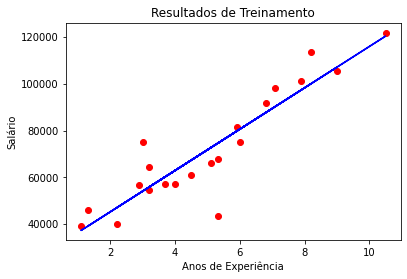

In [7]:
plt.scatter(X_treino,y_treino, color='red')  # exibir as amostras dos dados
plt.plot(X_treino, regressor.predict(X_treino), color='blue') # mostrar a reta que representa o modelo
plt.title('Resultados de Treinamento')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

In [9]:
y_pred = regressor.predict(X_teste)

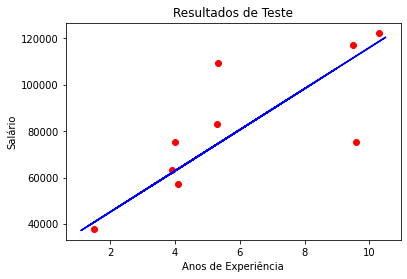

In [10]:
plt.scatter(X_teste,y_teste, color='red')  # exibir as amostras dos dados
plt.plot(X_treino, regressor.predict(X_treino), color='blue') # manter a mesma reta do modelo treinado
plt.title('Resultados de Teste')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

In [11]:
print(regressor.predict([[100]]))

[[911948.44176078]]
